In [ ]:
# ✅ STEP 1: Install required packages

!pip install "pyglet<2"
!pip install trimesh torch torchvision matplotlib numpy opencv-python tqdm

In [ ]:
# ✅ STEP 2: Install Dependencies

import os
import shutil
import random
import torch
import numpy as np
import cv2
import trimesh
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import datasets, models
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from PIL import Image

In [ ]:
# ✅ STEP 3: Setup Google Drive & Device

from google.colab import drive
drive.mount('/content/drive')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Mounted at /content/drive
Using device: cuda


In [ ]:
# ✅ STEP 4: Define Paths for 3D data to 2D data

# 3D/original data paths
IntrA_PATH = "/content/drive/MyDrive/CVDL_Lab/Project/IntrA/"
GENERATED_PATH = os.path.join(IntrA_PATH, "generated")
GENERATED_ANEURYSM_PATH = os.path.join(GENERATED_PATH, "aneurysm")
GENERATED_VESSEL_PATH = os.path.join(GENERATED_PATH, "vessel")

# 2D images data paths
IntrA_2D_PATH = "/content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/"
GENERATED_2D_PATH = os.path.join(IntrA_2D_PATH, "generated_2D")
GENERATED_ANEURYSM_2D_PATH = os.path.join(GENERATED_2D_PATH, "aneurysm_2D")
GENERATED_VESSEL_2D_PATH = os.path.join(GENERATED_2D_PATH, "vessel_2D")
TEST_2D_PATH = os.path.join(IntrA_2D_PATH, "test_2D")

In [ ]:
# ✅ STEP 5: Function to check and create paths

def ensure_path_exists(path):
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
        print(f"📂 Created: {path}")
    else:
        print(f"Path exists: {path}")

In [ ]:
# ✅ STEP 6: Function call (step 5) - Ensure 2D images paths, if not, create them

paths = [
    IntrA_2D_PATH,
    GENERATED_2D_PATH,
    GENERATED_ANEURYSM_2D_PATH,
    GENERATED_VESSEL_2D_PATH,
    TEST_2D_PATH
]

# Check and create each path
for path in paths:
    ensure_path_exists(path)

print("\n All required paths are set up!")

Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/
Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D
Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D/aneurysm_2D
Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D/vessel_2D
Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/test_2D

 All required paths are set up!


In [ ]:
# ✅ STEP 7: Function definition - Convert 3D Meshes (.obj) to 2D Images

def convert_3d_to_2d(mesh_path, save_path):
    try:
        mesh = trimesh.load(mesh_path)
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.scatter(mesh.vertices[:, 0], mesh.vertices[:, 1], s=1, c="black")
        ax.axis("off")
        plt.savefig(save_path, bbox_inches="tight", pad_inches=0, dpi=300)
        plt.close()
    except Exception as e:
        print(f"Error processing {mesh_path}: {e}")

In [ ]:
# ✅ STEP 8: Function call (step 7) - Convert 3D Meshes (.obj) to 2D Images

# ⏩Process aneurysm_2D and vessel_2D categories from generated folder
print("⏩ 2D conversion of Generated folder starts!")

print("🖋 2D conversion of Aneurysm data in Generated folder starts!")
os.makedirs(GENERATED_ANEURYSM_2D_PATH, exist_ok=True)

# Check if aneurysm data already exists
if len(os.listdir(GENERATED_ANEURYSM_2D_PATH)) > 0:
    print(f"⚠️ Data already present in {GENERATED_ANEURYSM_2D_PATH}, skipping conversion.")
    print(f"2D images of Aneurysm in Generated folder stored in: {GENERATED_ANEURYSM_2D_PATH}")
else:
    for file in tqdm(os.listdir(os.path.join(GENERATED_ANEURYSM_PATH, "obj")), desc="Processing aneursym dataset in generated folder"):
        if file.endswith(".obj"):  # Ensure only .obj files are processed
            mesh_path = os.path.join(GENERATED_ANEURYSM_PATH, "obj", file)
            save_path = os.path.join(GENERATED_ANEURYSM_2D_PATH, file.replace(".obj", ".png"))
            convert_3d_to_2d(mesh_path, save_path)

print("🖋 2D conversion of Vessel data in Generated folder starts!")
os.makedirs(GENERATED_VESSEL_2D_PATH, exist_ok=True)
# Check if vessel data already exists
if len(os.listdir(GENERATED_VESSEL_2D_PATH)) > 0:
    print(f"⚠️ Data already present in {GENERATED_VESSEL_2D_PATH}, skipping conversion.")
    print(f"2D images of Vessel in Generated folder stored in: {GENERATED_VESSEL_2D_PATH}")
else:
    for file in tqdm(os.listdir(os.path.join(GENERATED_VESSEL_PATH, "obj")), desc="Processing vessel dataset in generated folder"):
        if file.endswith(".obj"):  # Ensure only .obj files are processed
            mesh_path = os.path.join(GENERATED_VESSEL_PATH, "obj", file)
            save_path = os.path.join(GENERATED_VESSEL_2D_PATH, file.replace(".obj", ".png"))
            convert_3d_to_2d(mesh_path, save_path)

print(" ✅ 2D conversion of Generated data completed!\n")


⏩ 2D conversion of Generated folder starts!
🖋 2D conversion of Aneurysm data in Generated folder starts!
⚠️ Data already present in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D/aneurysm_2D, skipping conversion.
2D images of Aneurysm in Generated folder stored in: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D/aneurysm_2D
🖋 2D conversion of Vessel data in Generated folder starts!
⚠️ Data already present in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D/vessel_2D, skipping conversion.
2D images of Vessel in Generated folder stored in: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D/vessel_2D
 ✅ 2D conversion of Generated data completed!



In [ ]:
# ✅ STEP 9: Define Augmented 2D images data paths

AUGMENTED_2D_PATH = os.path.join(IntrA_2D_PATH, "augmented_2D")
AUGMENTED_ANEURYSM_PATH = os.path.join(AUGMENTED_2D_PATH, "aneurysm_2D_aug")
AUGMENTED_VESSEL_PATH = os.path.join(AUGMENTED_2D_PATH, "vessel_2D_aug")

In [ ]:
# ✅ STEP 10: Function call (step 5) - Ensure Augmented 2D images paths, if not, create them

paths = [
    AUGMENTED_2D_PATH,
    AUGMENTED_ANEURYSM_PATH,
    AUGMENTED_VESSEL_PATH
]

# Check and create each path
for path in paths:
    ensure_path_exists(path)

print("\n ✅ All required paths for augmented data are set up!")

Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/augmented_2D
Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/augmented_2D/aneurysm_2D_aug
Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/augmented_2D/vessel_2D_aug

 ✅ All required paths for augmented data are set up!


In [ ]:
# ✅ STEP 11: "Augmentated Data" transformations

from torchvision import transforms

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adding color jitter
    transforms.RandomVerticalFlip(),  # Adding random vertical flip
    transforms.ToTensor()
])


In [ ]:
# ✅ STEP 12: Function to augment dataset

def augment_images(source_dir, target_dir, num_augmentations=5):
    images = [f for f in os.listdir(source_dir) if f.endswith(".png")]

    if len(images) == 0:
        print(f"❌ ERROR: No images found in {source_dir}, skipping augmentation.")
        return

    print(f"Before augmentation: {len(images)} images in {source_dir}")

    # Check if augmented data already exists
    if os.path.exists(target_dir) and len(os.listdir(target_dir)) > 0:
        print(f"⚠️ Data already present in {target_dir}, skipping augmentation.")
        print(f"Total images in {target_dir}: {len(os.listdir(target_dir))}\n")
        return  # Skip augmentation if data is already present

    os.makedirs(target_dir, exist_ok=True)  # Ensure target directory exists

    for img_name in tqdm(images, desc=f"Augmenting {source_dir}"):
        img_path = os.path.join(source_dir, img_name)
        image = Image.open(img_path).convert("RGB")

        for i in range(num_augmentations):
            augmented_image = transform(image)
            augmented_image_pil = transforms.ToPILImage()(augmented_image)
            save_path = os.path.join(target_dir, f"aug_{i}_{img_name}")
            augmented_image_pil.save(save_path)

    final_images = os.listdir(target_dir)
    print(f"✅ Augmentation completed: {len(final_images)} images in {target_dir} \n")

In [ ]:
# ✅ STEP 13: Function call (step 12)- Apply augmentation to aneurysm and vessel images

augment_images(os.path.join(GENERATED_2D_PATH, "aneurysm_2D"), AUGMENTED_ANEURYSM_PATH)
augment_images(os.path.join(GENERATED_2D_PATH, "vessel_2D"), AUGMENTED_VESSEL_PATH)

print("\n ✅ Data augmentation completed and saved in aneurysm_2D & vessel_2D!")

Before augmentation: 215 images in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D/aneurysm_2D
⚠️ Data already present in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/augmented_2D/aneurysm_2D_aug, skipping augmentation.
Total images in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/augmented_2D/aneurysm_2D_aug: 1075

Before augmentation: 1714 images in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D/vessel_2D
⚠️ Data already present in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/augmented_2D/vessel_2D_aug, skipping augmentation.
Total images in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/augmented_2D/vessel_2D_aug: 8570


 ✅ Data augmentation completed and saved in aneurysm_2D & vessel_2D!


In [ ]:
# ✅ STEP 14: Define paths for splitting dataset into train and test for learning

# Source folders for splitting
ANEURYSM_SOURCE = os.path.join(AUGMENTED_2D_PATH, "aneurysm_2D_aug")
VESSEL_SOURCE = os.path.join(AUGMENTED_2D_PATH, "vessel_2D_aug")

# Destination folders after splitting
LEARN_2D_PATH = os.path.join(IntrA_2D_PATH, "learn_2D")
TRAIN_PATH = os.path.join(LEARN_2D_PATH, "train_2D")
TEST_PATH = os.path.join(LEARN_2D_PATH, "test_2D")

TRAIN_ANEURYSM = os.path.join(TRAIN_PATH, "aneurysm")
TRAIN_VESSEL = os.path.join(TRAIN_PATH, "vessel")
TEST_ANEURYSM = os.path.join(TEST_PATH, "aneurysm")
TEST_VESSEL = os.path.join(TEST_PATH, "vessel")



In [ ]:
# ✅ STEP 15: Function call (step 5) - Ensure 2D images paths, if not, create them

paths = [
    TRAIN_PATH,
    TEST_PATH,
    TRAIN_ANEURYSM,
    TRAIN_VESSEL,
    TEST_ANEURYSM,
    TEST_VESSEL
]

# Check and create each path
for path in paths:
    ensure_path_exists(path)

print("\n ✅ All required paths for learn data are set up!")

Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/train_2D
Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/test_2D
Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/train_2D/aneurysm
Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/train_2D/vessel
Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/test_2D/aneurysm
Path exists: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/test_2D/vessel

 ✅ All required paths for learn data are set up!


In [ ]:
# ✅ STEP 16: Function to split dataset safely into train and test for learning

def split_data(source, train_dest, test_dest, split_ratio=0.8):

    if not os.path.exists(source):
        raise FileNotFoundError("❌ ERROR: Source directory do not exist. Check augmentation step.")
    else:
        print("✅ Source directory verified.\n 🖋 Proceeding with dataset splitting.")

    # Check if source is empty
    files = os.listdir(source)
    if len(files) == 0:
        print(f"⚠️ WARNING: No images found in {source}. Skipping...")
        return

    # Check if learn data already exists
    if (os.path.exists(train_dest) and os.path.exists(test_dest)) and ((len(os.listdir(train_dest)) and len(os.listdir(test_dest)))> 0):
        print(f"⚠️ Data already present in {train_dest}, skipping dataset splitting.")
        print(f"Total images in {train_dest}: {len(os.listdir(train_dest))}")
        print(f"Total images in {test_dest}: {len(os.listdir(test_dest))}\n")
        return  # Skip train and test splitting if data is already present

    random.shuffle(files)  # Shuffle for randomness
    split_idx = int(len(files) * split_ratio)
    train_files, test_files = files[:split_idx], files[split_idx:]

    # Copy files to respective folders
    for file in train_files:
        shutil.copy(os.path.join(source, file), os.path.join(train_dest, file))

    for file in test_files:
        shutil.copy(os.path.join(source, file), os.path.join(test_dest, file))

    print(f"⏩ {source} -> \n Train={len(train_files)}, Test={len(test_files)}\n")

In [ ]:
# ✅ STEP 17: Function call (step 16) - Split both aneurysm & vessel datasets

split_data(ANEURYSM_SOURCE, TRAIN_ANEURYSM, TEST_ANEURYSM)
split_data(VESSEL_SOURCE, TRAIN_VESSEL, TEST_VESSEL)

✅ Source directory verified.
 🖋 Proceeding with dataset splitting.
⚠️ Data already present in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/train_2D/aneurysm, skipping dataset splitting.
Total images in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/train_2D/aneurysm: 860
Total images in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/test_2D/aneurysm: 215

✅ Source directory verified.
 🖋 Proceeding with dataset splitting.
⚠️ Data already present in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/train_2D/vessel, skipping dataset splitting.
Total images in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/train_2D/vessel: 6856
Total images in /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/test_2D/vessel: 1714



In [ ]:
# ✅ STEP 18: Define Hyperparameters

num_epochs = 20           # Number of training iterations
batch_size = 32          # Number of images per batch
lr = 0.0001              # learning_rate-Step size for optimizer
weight_decay = 1e-4      # L2 regularization (prevents overfitting)
momentum = 0.9           # Used in SGD optimizer
num_classes = 2          # Aneurysm vs. Vessel classification


In [ ]:
# ✅ STEP 19: "Learn Data" transformations

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


In [ ]:
# ✅ STEP 20: Load Datasets

train_dataset = datasets.ImageFolder(root=TRAIN_PATH, transform=train_transforms)
test_dataset = datasets.ImageFolder(root=TEST_PATH, transform=test_transforms)

In [ ]:
# ✅ STEP 21: Compute Class Weights and Weighted Sampler

from torch.utils.data import DataLoader, WeightedRandomSampler
from sklearn.utils.class_weight import compute_class_weight

labels = [label for _, label in train_dataset.samples]

# Compute Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print(f"Class weights: {class_weights}")

# Weighted Sampler (for handling class imbalance)
sample_weights = [class_weights[label] for _, label in train_dataset.samples]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)
print(f"Weighted Sampler: {sampler}")

Class weights: tensor([4.4860, 0.5627], device='cuda:0')
Weighted Sampler: <torch.utils.data.sampler.WeightedRandomSampler object at 0x7cdd5b375450>


In [ ]:
# ✅ STEP 22: DataLoaders

train_loader = DataLoader(train_dataset, batch_size, sampler=sampler, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False, num_workers=2)

In [ ]:
# ✅ STEP 23: Load ResNet-18 Model (Pretrained on ImageNet)

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features  # Get the input features of final layer
model.fc = nn.Linear(num_ftrs, num_classes)  # Modify last layer for binary classification ; num_classes = 2 Binary Classification (Aneurysm vs. Vessel)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 189MB/s]


In [ ]:
# ✅ STEP 24: Train the model

#Loss & Optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)  # Weighted Loss
optimizer = optim.Adam(model.parameters(), lr)

# Store loss per epoch
train_losses = []

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()


    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)  # Store epoch-wise loss
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")


print("✅ Training Complete!")

Epoch 1/20: 100%|██████████| 242/242 [21:34<00:00,  5.35s/it]


Epoch [1/20], Loss: 0.1978


Epoch 2/20: 100%|██████████| 242/242 [12:22<00:00,  3.07s/it]


Epoch [2/20], Loss: 0.1010


Epoch 3/20: 100%|██████████| 242/242 [07:38<00:00,  1.89s/it]


Epoch [3/20], Loss: 0.0817


Epoch 4/20: 100%|██████████| 242/242 [05:07<00:00,  1.27s/it]


Epoch [4/20], Loss: 0.0582


Epoch 5/20: 100%|██████████| 242/242 [02:54<00:00,  1.39it/s]


Epoch [5/20], Loss: 0.0413


Epoch 6/20: 100%|██████████| 242/242 [02:22<00:00,  1.70it/s]


Epoch [6/20], Loss: 0.0443


Epoch 7/20: 100%|██████████| 242/242 [01:41<00:00,  2.39it/s]


Epoch [7/20], Loss: 0.0357


Epoch 8/20: 100%|██████████| 242/242 [01:13<00:00,  3.30it/s]


Epoch [8/20], Loss: 0.0316


Epoch 9/20: 100%|██████████| 242/242 [01:05<00:00,  3.69it/s]


Epoch [9/20], Loss: 0.0269


Epoch 10/20: 100%|██████████| 242/242 [00:57<00:00,  4.23it/s]


Epoch [10/20], Loss: 0.0229


Epoch 11/20: 100%|██████████| 242/242 [00:55<00:00,  4.34it/s]


Epoch [11/20], Loss: 0.0277


Epoch 12/20: 100%|██████████| 242/242 [00:53<00:00,  4.52it/s]


Epoch [12/20], Loss: 0.0336


Epoch 13/20: 100%|██████████| 242/242 [00:50<00:00,  4.76it/s]


Epoch [13/20], Loss: 0.0086


Epoch 14/20: 100%|██████████| 242/242 [00:51<00:00,  4.69it/s]


Epoch [14/20], Loss: 0.0144


Epoch 15/20: 100%|██████████| 242/242 [00:49<00:00,  4.89it/s]


Epoch [15/20], Loss: 0.0204


Epoch 16/20: 100%|██████████| 242/242 [00:48<00:00,  4.98it/s]


Epoch [16/20], Loss: 0.0231


Epoch 17/20: 100%|██████████| 242/242 [00:48<00:00,  5.02it/s]


Epoch [17/20], Loss: 0.0368


Epoch 18/20: 100%|██████████| 242/242 [00:48<00:00,  5.00it/s]


Epoch [18/20], Loss: 0.0113


Epoch 19/20: 100%|██████████| 242/242 [00:49<00:00,  4.87it/s]


Epoch [19/20], Loss: 0.0116


Epoch 20/20: 100%|██████████| 242/242 [00:47<00:00,  5.04it/s]

Epoch [20/20], Loss: 0.0359
✅ Training Complete!


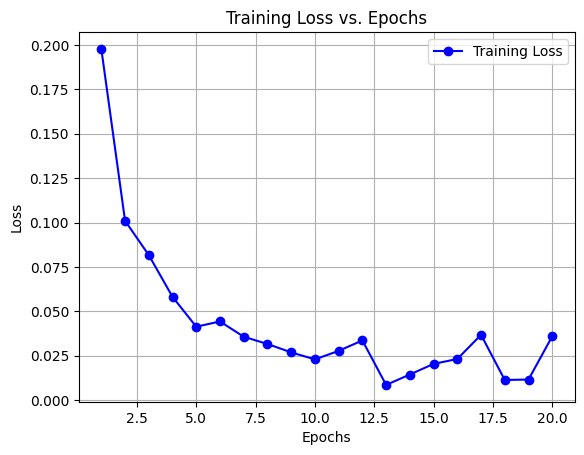

In [ ]:
# ✅ STEP 25: Plot Training Loss vs. Epochs
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), train_losses, marker='o', linestyle='-', color='b', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs. Epochs")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# ✅ STEP 26:  Evaluate model on test dataset

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [ ]:
# ✅ STEP 27: Classification Report

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=["Vessel", "Aneurysm"]))

Classification Report:
              precision    recall  f1-score   support

      Vessel       0.86      0.98      0.92       215
    Aneurysm       1.00      0.98      0.99      1714

    accuracy                           0.98      1929
   macro avg       0.93      0.98      0.95      1929
weighted avg       0.98      0.98      0.98      1929



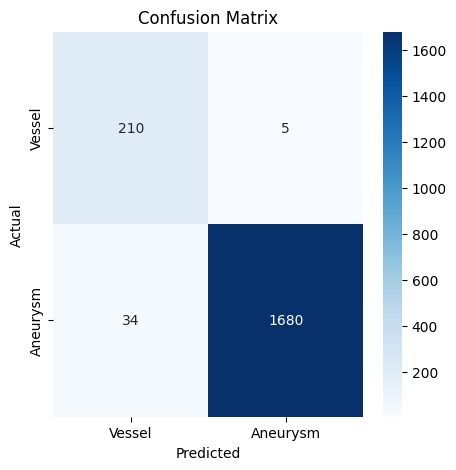

In [ ]:
# ✅ STEP 28: Confusion Matrix

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Vessel", "Aneurysm"], yticklabels=["Vessel", "Aneurysm"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Selected image: /content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/learn_2D/test_2D/vessel/aug_4_ArteryObjAN125-16.png, Label: 1


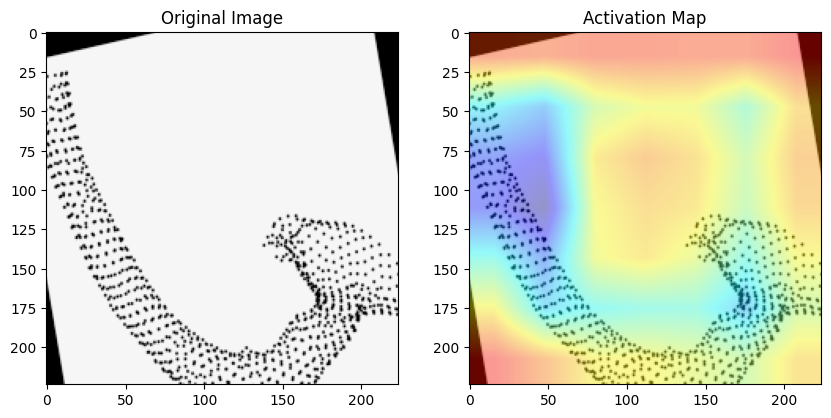

In [ ]:
# ✅ STEP 29: Activation Map

import cv2
import numpy as np
import random
from torchvision import transforms
from PIL import Image

# Define transform for binary image
gradcam_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Randomly select a test image
rand_idx = random.randint(0, len(test_dataset) - 1)
sample_path, sample_label = test_dataset.samples[rand_idx]
print(f"Selected image: {sample_path}, Label: {sample_label}")

# Load and preprocess the selected binary image
sample_image = Image.open(sample_path).convert("L")  # Load as grayscale
sample_image = gradcam_transform(sample_image)         # Transform to 3-channel RGB, resize, normalize
input_tensor = sample_image.unsqueeze(0).to(device)

# Forward pass to get activations
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

activation = {}
model.layer4.register_forward_hook(get_activation("layer4"))
output = model(input_tensor)

# Generate Grad-CAM heatmap
act_map = activation["layer4"].squeeze().cpu().numpy()
heatmap = np.mean(act_map, axis=0)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (224, 224))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Overlay heatmap on original image
orig_img = cv2.imread(sample_path)
orig_img = cv2.resize(orig_img, (224, 224))
superimposed_img = cv2.addWeighted(orig_img, 0.6, heatmap, 0.4, 0)

# Display the activation map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(orig_img)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title("Activation Map")
plt.show()


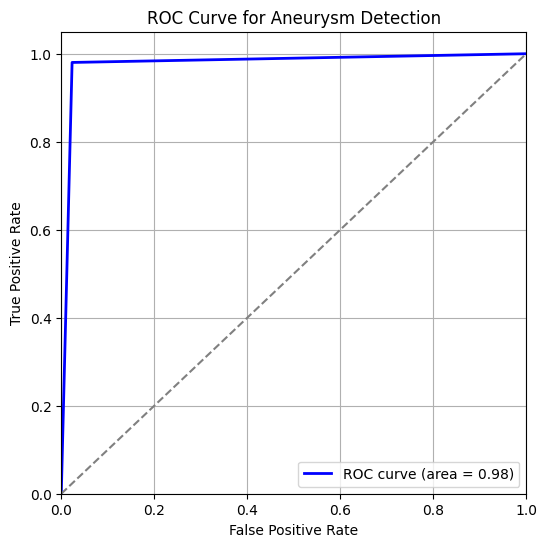

In [ ]:
# ✅ STEP 29: ROC and AUC Curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Convert labels and predictions to NumPy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(all_labels, all_preds)  # False Positive Rate, True Positive Rate
roc_auc = auc(fpr, tpr)  # Compute AUC score

# Plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Aneurysm Detection")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
"""
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Define paths
TRAIN_PATH = "/content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D/train_2D"
TEST_PATH = "/content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D/test_2D"

# ✅ Define image transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3-channel
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# ✅ Load datasets
train_dataset = datasets.ImageFolder(root=TRAIN_PATH, transform=transform)
test_dataset = datasets.ImageFolder(root=TEST_PATH, transform=transform)

# ✅ Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ✅ Define CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 2)  # 2 classes (aneurysm, vessel)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# ✅ Model Training Function
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

# ✅ Model Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Vessel', 'Aneurysm']))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Vessel', 'Aneurysm'], yticklabels=['Vessel', 'Aneurysm'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ✅ Train & Evaluate the Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, criterion, optimizer, epochs=10)
evaluate_model(model, test_loader)
"""

'\nimport torch\nimport torch.nn as nn\nimport torch.optim as optim\nimport torchvision.transforms as transforms\nimport torchvision.datasets as datasets\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport seaborn as sns\nfrom torch.utils.data import DataLoader\nfrom sklearn.metrics import classification_report, confusion_matrix\n\n# ✅ Define paths\nTRAIN_PATH = "/content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D/train_2D"\nTEST_PATH = "/content/drive/MyDrive/CVDL_Lab/Project/IntrA_2D/generated_2D/test_2D"\n\n# ✅ Define image transformations\ntransform = transforms.Compose([\n    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3-channel\n    transforms.Resize((128, 128)),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=[0.5], std=[0.5])\n])\n\n# ✅ Load datasets\ntrain_dataset = datasets.ImageFolder(root=TRAIN_PATH, transform=transform)\ntest_dataset = datasets.ImageFolder(root=TEST_PATH, transform=transform)\n\n# ✅ Create DataLoaders\